--2022-02-15 15:31:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.001s  

2022-02-15 15:31:48 (103 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]

80.22492970946578
Mean absolute error: 22.05
Residual sum of squares (MSE): 971.47
R2-score: 0.77


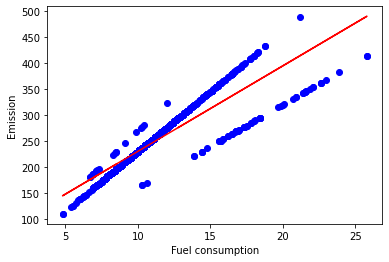

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline

!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
#df.head()

# summarize the data
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
#cdf.head(9)

#viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
#viz.hist()
#plt.show()

#plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
#plt.xlabel("FUELCONSUMPTION_COMB")
#plt.ylabel("Emission")
#plt.show()

#plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
#plt.xlabel("Engine size")
#plt.ylabel("Emission")
#plt.show()

#plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
#plt.xlabel("Cylinders")
#plt.ylabel("Emission")
#plt.show()

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
#print(len(train))
test = cdf[~msk]
#print(train.head(9))
#print(test.head(9))
#print(len(test))
print(len(train)/(len(test)+len(train))*100)

#plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
#plt.xlabel("Engine size")
#plt.ylabel("Emission")
#plt.show()

#regr = linear_model.LinearRegression()
#train_x = np.asanyarray(train[['ENGINESIZE']])
#train_y = np.asanyarray(train[['CO2EMISSIONS']])
#regr.fit(train_x, train_y)
# The coefficients
#print ('Coefficients: ', regr.coef_)
#print ('Intercept: ',regr.intercept_)

#plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
#train_y_hat = regr.coef_[0][0]*train_x + regr.intercept_[0]
#plt.plot(train_x, train_y_hat, '-r')
#plt.xlabel("Engine size")
#plt.ylabel("Emission")

#test_x = np.asanyarray(test[['ENGINESIZE']])
#test_y = np.asanyarray(test[['CO2EMISSIONS']])
#test_y_ = regr.predict(test_x)

#print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
#print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
#print("R2-score: %.2f" % r2_score(test_y , test_y_) )

train_x2 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])

regr2 = linear_model.LinearRegression()
regr2.fit(train_x2, train_y2)

plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
train_y_2 = regr2.coef_[0][0]*train_x2 + regr2.intercept_[0]
plt.plot(train_x2, train_y_2, '-r')
plt.xlabel("Fuel consumption")
plt.ylabel("Emission")

test_x2 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])
test_y_2 = regr2.predict(test_x2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_2 - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_2 - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y2 , test_y_2) )





